In [1]:
import numpy as np
import time as tm
import datetime as dt
import tensorflow as tf
from yahoo_fin import stock_info as yf
from sklearn.preprocessing import MinMaxScaler
from collections import deque
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
import matplotlib.pyplot as plt

In [2]:
STOCK = 'KAHOT.OL'

# Current date
date_now = tm.strftime('%Y-%m-%d')
date_3_years_back = ((dt.date.today() - dt.timedelta(days=1)) - dt.timedelta(days=50)).strftime('%Y-%m-%d')
init_df = yf.get_data(
    STOCK, 
    start_date=date_3_years_back, 
    end_date=date_now, 
    interval='1d')
init_df = init_df.drop(['open', 'high', 'low', 'adjclose', 'ticker', 'volume'], axis=1)
init_df['date'] = init_df.index

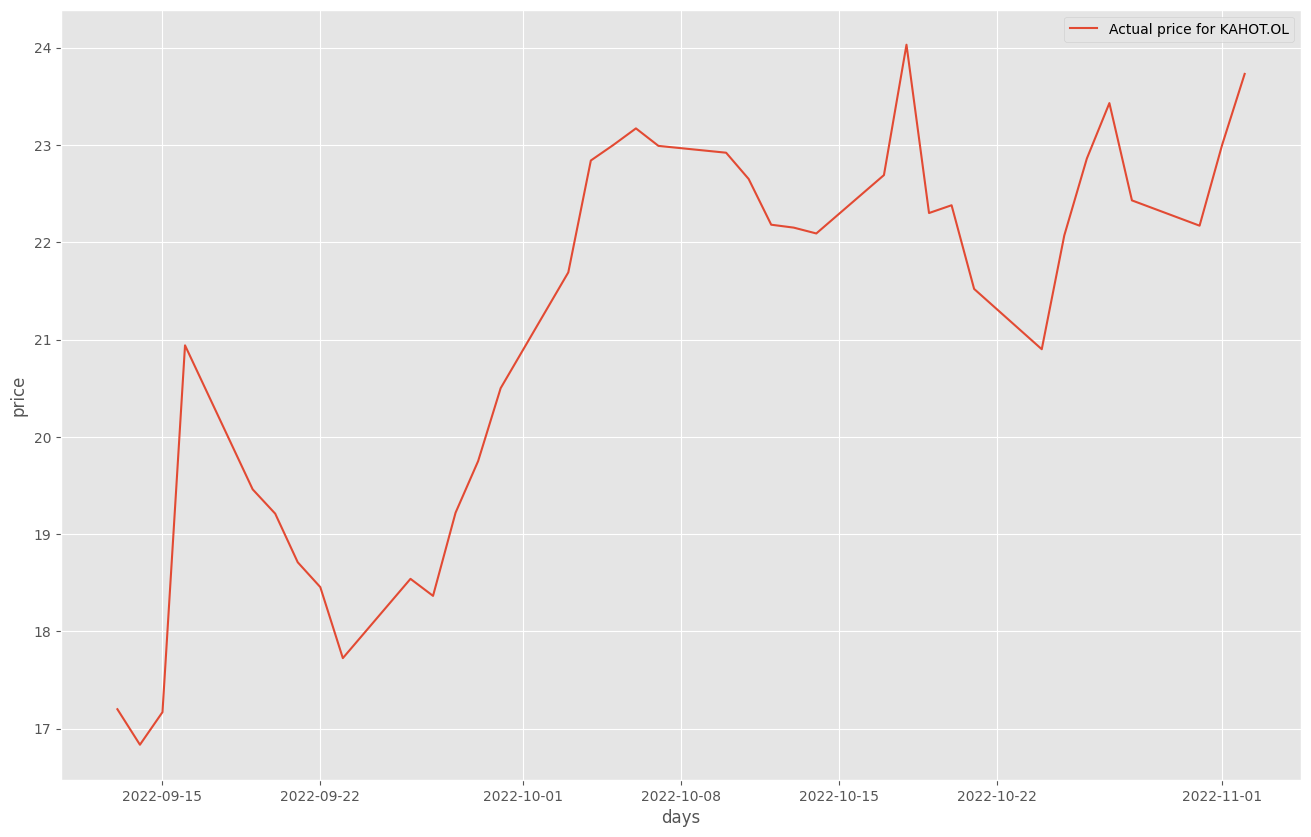

In [3]:
plt.style.use(style='ggplot')
plt.figure(figsize=(16,10))
plt.plot(init_df['close'][-200:])
plt.xlabel("days")
plt.ylabel("price")
plt.legend([f'Actual price for {STOCK}'])
plt.show()

In [4]:
scaler = MinMaxScaler()
init_df['close'] = scaler.fit_transform(np.expand_dims(init_df['close'].values, axis=1))

In [5]:
init_df['close'].shape

(37,)

In [6]:
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
 
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = init_df['close']#[10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
print(X,y)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=1)
# demonstrate prediction
x_input = array(init_df['close'][-3:])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

[[0.0507299  0.         0.04656024]
 [0.         0.04656024 0.57053517]
 [0.04656024 0.57053517 0.36483661]
 [0.57053517 0.36483661 0.33009027]
 [0.36483661 0.33009027 0.26059758]
 [0.33009027 0.26059758 0.22515643]
 [0.26059758 0.22515643 0.12369716]
 [0.22515643 0.12369716 0.23697032]
 [0.12369716 0.23697032 0.21264772]
 [0.23697032 0.21264772 0.33148015]
 [0.21264772 0.33148015 0.4051425 ]
 [0.33148015 0.4051425  0.50938153]
 [0.4051425  0.50938153 0.6747742 ]
 [0.50938153 0.6747742  0.83460733]
 [0.6747742  0.83460733 0.85684497]
 [0.83460733 0.85684497 0.88047249]
 [0.85684497 0.88047249 0.85545508]
 [0.88047249 0.85545508 0.84572615]
 [0.85545508 0.84572615 0.80820003]
 [0.84572615 0.80820003 0.742877  ]
 [0.80820003 0.742877   0.73870735]
 [0.742877   0.73870735 0.7303683 ]
 [0.73870735 0.7303683  0.81375958]
 [0.7303683  0.81375958 1.        ]
 [0.81375958 1.         0.7595551 ]
 [1.         0.7595551  0.77067392]
 [0.7595551  0.77067392 0.65114668]
 [0.77067392 0.65114668 0.56

In [7]:
scaler.inverse_transform(yhat)[0][0]

23.378971

In [8]:
x_input = array(init_df['close'][-2:])
x_input = np.append(x_input,yhat)



In [9]:
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)
scaler.inverse_transform(yhat)[0][0]

1/1 [==============================] - 0s 25ms/step
[[0.8664928]]


23.069416